# Exploratory Data Analysis (EDA)

This exploratory data analysis examines the relationship between parental socio-educational background and children’s cognitive abilities. Specifically, we explore associations between parental education levels and both mathematical performance and verbal ability, using correlation analysis and visualizations.

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from data_analysis import fetch_total_math_score

df = pd.read_csv("main_dataset.csv")
df.head()

,Unnamed: 0,participant_id,age_ses-T1,age_ses-T2,sex,handedness,T1w_date,Syllogisms_run-01_date,Syllogisms_run-02_date,Transitive_run-01_date,...,WASI_BD_T-Score_t2,WASI_Sim_Raw_t2,WASI_Sim_T-Score_t2,WASI_MR_Raw_t2,WASI_MR_T-Score_t2,WASI_VIQ_t2,WASI_PIQ_t2,WASI_FSIQ_t2,WJ-III_MathFluency_Raw_t2,WJ-III_MathFluency_StS_t2
0,0,sub-002,9.23,11.28,female,right,2009-08-25,2009-09-14,2009-09-14,2009-09-14,...,67.0,34.0,66.0,31.0,67.0,127.0,131.0,133.0,56.0,84.0
1,1,sub-003,10.68,NaN,female,right,2009-07-17,2010-09-03,2010-09-03,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,sub-004,9.93,NaN,female,right,2011-02-24,2011-03-03,2011-03-03,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,sub-005,11.98,14.34,male,right,2009-10-02,2009-12-18,2009-12-18,2009-12-18,...,54.0,40.0,67.0,30.0,58.0,125.0,109.0,119.0,134.0,119.0
4,4,sub-006,8.90,11.14,female,right,2010-09-26,2011-01-01,2011-01-01,2011-01-01,...,55.0,20.0,40.0,28.0,61.0,88.0,112.0,100.0,79.0,105.0


## Variable Selection

To explore the relationship between socio-educational background and math abilities,
we selected a subset of variables from the dataset.

The analysis focuses on two main groups of variables:

**Socio-educational background variables**
- Parental education level (mother and father)
- School type
- Regular classroom status

**Math-related cognitive variables**
- CMAT Basic Calculation Quotient
- KeyMath sub-scores (Numeration, Measurement, Problem Solving)
- WJ-III Math Fluency score

These variables were chosen to reflect both environmental background factors
and core mathematical performance measures.
Math-related variables were selected to represent numerical reasoning, while verbal IQ (VIQ) was included to capture language-related cognitive abilities.

In [63]:
df['total_math_score'] = fetch_total_math_score(df)

In [64]:
# --- Select background (socio-educational) variables ---
background_vars = [
    "mother_highest_grade",
    "father_highest_grade",
    "school_type",
    "regular_classroom"
]

# --- Select math-related cognitive variables ---
math_vars = [
    'total_math_score',
    "CMAT_BasicCalc_Comp_Quotient",
    "KeyMath_Numeration_ScS",
    "KeyMath_Measurement_ScS",
    "KeyMath_ProblemSolving_ScS",
    "WJ-III_MathFluency_StS",
    "WASI_VIQ",
]


In [65]:
# Keep only relevant columns
eda_df = df[background_vars + math_vars].copy()

# Display basic info
# print(eda_df.info())
# print(eda_df.describe())


## Data Preparation

Before computing correlations, several background variables require preprocessing.
Parental education variables are ordinal, and classroom status is categorical.
Therefore, selected variables will be converted to numeric format where appropriate,
and non-numeric variables will be handled separately in the analysis.

In [66]:
# -------------------------
# Correlations (numeric only)
# -------------------------

# Convert background education columns to numeric (safe)
for col in ["mother_highest_grade", "father_highest_grade", "regular_classroom"]:
    eda_df[col] = pd.to_numeric(eda_df[col], errors="coerce")

# Numeric columns for correlation (exclude school_type because it's categorical text)
numeric_cols = [c for c in eda_df.columns if c != "school_type"]

# Correlation matrix
corr = eda_df[numeric_cols].corr(method="spearman")  # spearman is robust for ordinal scales
# print("\nSpearman correlation matrix (numeric vars):")
# print(corr.round(2))

## Correlation Analysis

To examine associations between socio-educational background variables
and math-related cognitive measures, Spearman correlation coefficients were computed.

Spearman correlation was selected because several background variables are ordinal
and do not necessarily meet normality assumptions. The correlation matrix below
provides an overview of the strength and direction of relationships between
background characteristics and math performance measures.
In addition to math-related measures, correlations with verbal IQ were examined to assess whether parental background is also associated with verbal abilities.

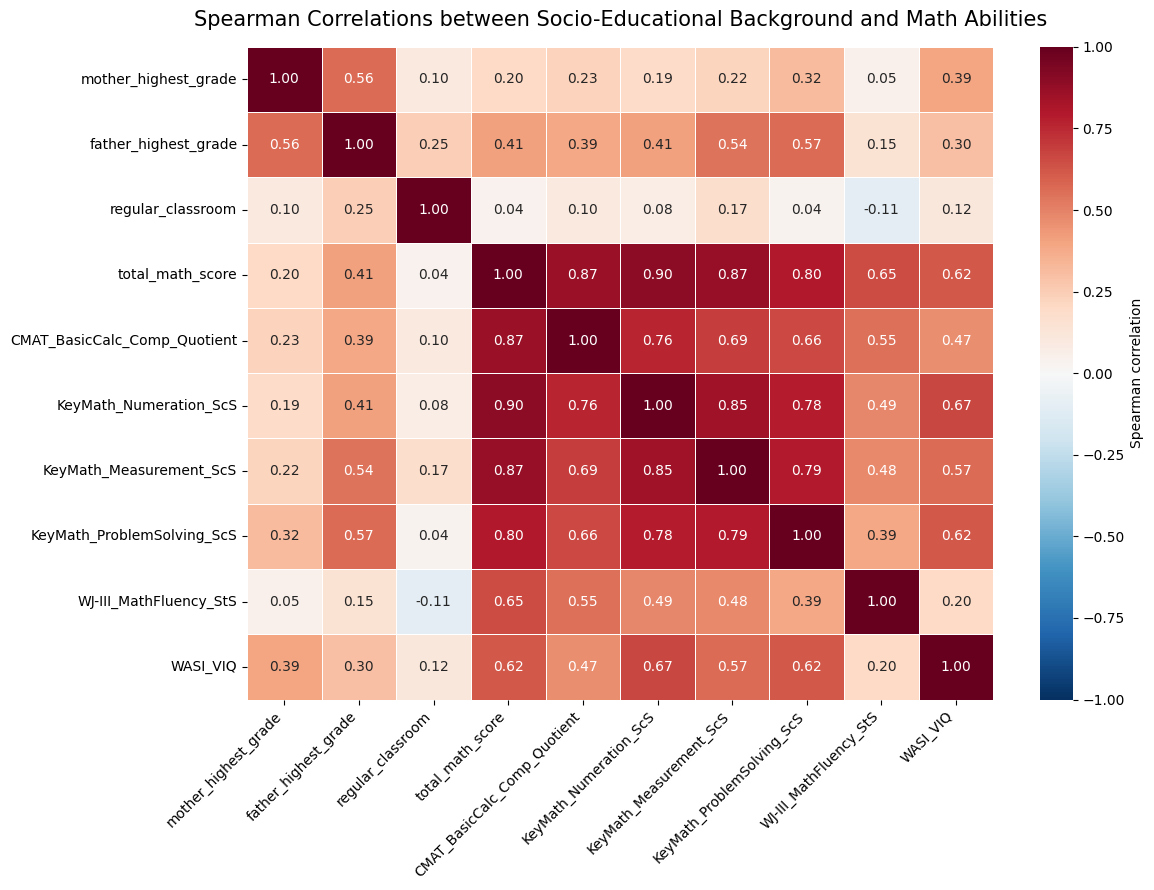

In [67]:
plt.figure(figsize=(12, 9))

sns.heatmap(
    corr,
    annot=True,
    fmt=".2f",
    cmap="RdBu_r",
    vmin=-1,
    vmax=1,
    linewidths=0.5,
    linecolor="white",
    annot_kws={"size": 10},
    cbar_kws={"label": "Spearman correlation"}
)

plt.title(
    "Spearman Correlations between Socio-Educational Background and Math Abilities",
    fontsize=15,
    pad=15
)

plt.xticks(rotation=45, ha="right")
plt.yticks(rotation=0)

plt.tight_layout()
plt.show()

### Parental Education and Verbal Abilities (EDA)
In addition to math-related outcomes, we examined whether parental educational background is associated with children’s verbal abilities.
Based on the theoretical expectation, children of parents with a more humanities-oriented background are expected to show stronger verbal performance.
To explore this pattern, correlations and scatter plots were used to examine the relationship between parental education levels and verbal IQ (VIQ).

In [68]:
# Correlation between parental education and verbal ability (VIQ)

verbal_corr = eda_df[
    ["mother_highest_grade", "father_highest_grade", "WASI_VIQ"]
].corr(method="spearman")

verbal_corr.round(2)

,mother_highest_grade,father_highest_grade,WASI_VIQ
mother_highest_grade,1.00,0.56,0.39
father_highest_grade,0.56,1.00,0.30
WASI_VIQ,0.39,0.30,1.00


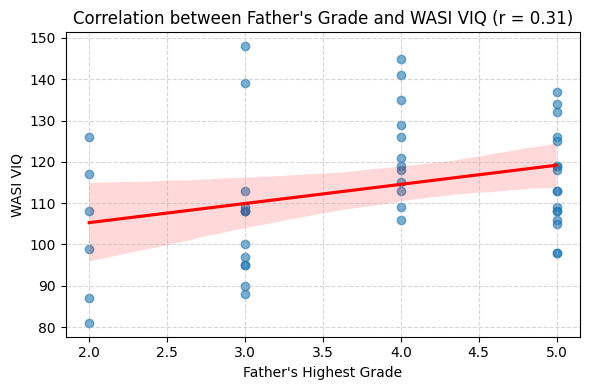

In [69]:
import matplotlib.pyplot as plt

corr_val = eda_df["father_highest_grade"].corr(eda_df["WASI_VIQ"])

plt.figure(figsize=(6, 4))
sns.regplot(
    x="father_highest_grade",
    y="WASI_VIQ",
    data=eda_df,
    scatter_kws={'alpha': 0.6}, # Transparency for points
    line_kws={'color': 'red'}    # Distinct color for the correlation line
)

plt.title(f"Correlation between Father's Grade and WASI VIQ (r = {corr_val:.2f})")
plt.xlabel("Father's Highest Grade")
plt.ylabel("WASI VIQ")
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

The scatter plot suggests that children whose fathers have higher education levels tend to show higher verbal IQ scores, indicating a positive relationship between parental education and verbal ability."

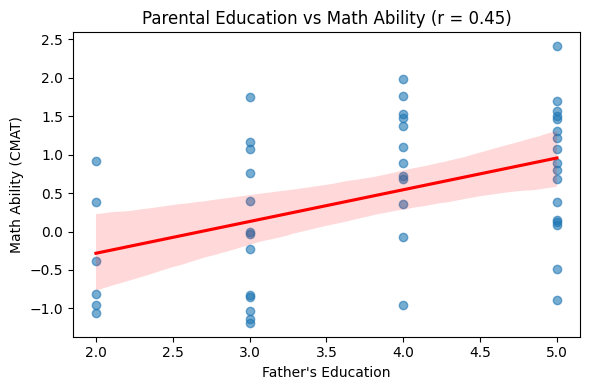

In [70]:
plt.figure(figsize=(6, 4))

# Verbal
corr_val = eda_df["father_highest_grade"].corr(eda_df["total_math_score"])
sns.regplot(
    x="father_highest_grade",
    y="total_math_score",
    data=eda_df,
    scatter_kws={'alpha': 0.6}, # Transparency for points
    line_kws={'color': 'red'}    # Distinct color for the correlation line
)


plt.xlabel("Father's Education")
plt.ylabel("Math Ability (CMAT)")
plt.title(f"Parental Education vs Math Ability (r = {corr_val:.2f})")

plt.tight_layout()
plt.show()

Figure Interpretation.
The left panel shows a positive association between father’s education level and children’s verbal ability (VIQ), while the right panel shows a positive association between father’s education level and math ability (CMAT). The visual comparison suggests that parental education is related to both verbal and mathematical performance, supporting the idea that socio-educational background is associated with multiple cognitive domains.

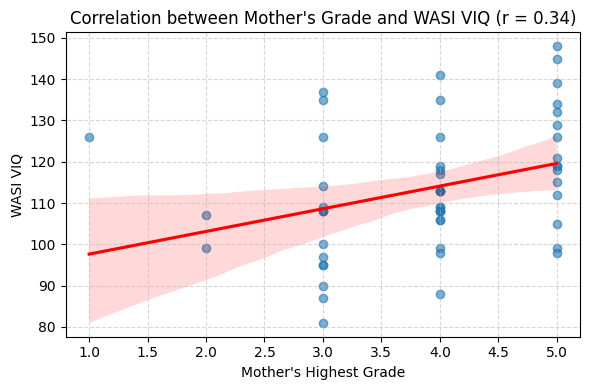

In [71]:
# Correlation between mother's education and verbal ability (VIQ)

corr_val_mother = eda_df["mother_highest_grade"].corr(eda_df["WASI_VIQ"])

plt.figure(figsize=(6, 4))
sns.regplot(
    x="mother_highest_grade",
    y="WASI_VIQ",
    data=eda_df,
    scatter_kws={'alpha': 0.6},
    line_kws={'color': 'red'}
)

plt.title(f"Correlation between Mother's Grade and WASI VIQ (r = {corr_val_mother:.2f})")
plt.xlabel("Mother's Highest Grade")
plt.ylabel("WASI VIQ")
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

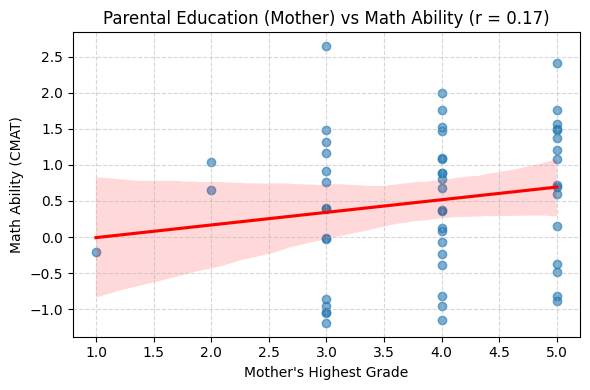

In [72]:
# Correlation between mother's education and math ability

corr_val_mother_math = eda_df["mother_highest_grade"].corr(eda_df["total_math_score"])

plt.figure(figsize=(6, 4))
sns.regplot(
    x="mother_highest_grade",
    y="total_math_score",
    data=eda_df,
    scatter_kws={'alpha': 0.6},
    line_kws={'color': 'red'}
)

plt.title(f"Parental Education (Mother) vs Math Ability (r = {corr_val_mother_math:.2f})")
plt.xlabel("Mother's Highest Grade")
plt.ylabel("Math Ability (CMAT)")
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

In [84]:
results = pd.read_csv("EDA/analysis_results_full.csv")
results.head()


results.head()


,participant_id,lisas,KeyMath_Numeration_ScS,CMAT_BasicCalc_Comp_Quotient,AWMA-S_VisuoSpatialSTM_StS,AWMA-S_VerbalSTM_StS,TOWRE_Total_StS,WASI_FSIQ,CTOPP_PhonAwareness_Comp,WASI_PIQ,...,AWMA-S_VerbalWM_StS_z,CTOPP_PhonAwareness_Comp_z,CTOPP_RapidNaming_Comp_z,TOWRE_Total_StS_z,WASI_VIQ_z,WASI_FSIQ_z,parental_bias_z,STEM_Index,Verbal_Index,Child_Cognitive_Bias
0,sub-002,2.778662,14,113,NaN,NaN,102,132,115,137,...,NaN,0.655384,0.519314,-0.504587,0.342638,1.267396,0.317083,0.603335,0.253187,0.350148
1,sub-003,2.177854,10,120,NaN,NaN,122,112,112,126,...,NaN,0.453728,-0.090789,0.933421,-0.971589,-0.138033,-0.061870,0.017784,0.081193,-0.063408
2,sub-004,1.879682,11,95,98.0,130.0,119,118,133,126,...,0.209099,1.865325,-1.310995,0.717720,-0.380187,0.283596,NaN,0.048183,0.427214,-0.379031
3,sub-005,2.884184,14,135,NaN,NaN,116,108,112,106,...,NaN,0.453728,-0.090789,0.502019,-0.380187,-0.419119,0.190765,0.233502,0.121193,0.112310
4,sub-006,2.232828,12,120,NaN,NaN,119,116,106,123,...,NaN,0.050414,-0.497524,0.717720,-0.445899,0.143053,-0.061870,0.397085,-0.043822,0.440908


In [86]:


results = pd.read_csv("EDA/analysis_results_full.csv")


IDX = {
    "STEM": "STEM_Index",
    "VERBAL": "Verbal_Index",
    "COG": "Child_Cognitive_Bias",        
    "PARENT_BIAS": "parental_bias_z" 
}

# Makeing sure these columns exist
missing = [v for v in IDX.values() if v not in results.columns]
if missing:
    raise KeyError(f"Missing expected columns in analysis_results_full.csv: {missing}")

# 3) Quick sanity: show the key columns
results[list(IDX.values())].head()


,STEM_Index,Verbal_Index,Child_Cognitive_Bias,parental_bias_z
0,0.603335,0.253187,0.350148,0.317083
1,0.017784,0.081193,-0.063408,-0.061870
2,0.048183,0.427214,-0.379031,NaN
3,0.233502,0.121193,0.112310,0.190765
4,0.397085,-0.043822,0.440908,-0.061870


In [75]:
results[list(IDX.values())].describe()


,STEM_Index,Verbal_Index,Child_Cognitive_Bias,parental_bias_z
count,56.000000,56.000000,56.000000,4.900000e+01
mean,0.004729,-0.002129,0.006858,4.078370e-17
std,0.730165,0.670743,0.568360,1.000000e+00
min,-1.515102,-1.662542,-1.559194,-1.830317e+00
25%,-0.569443,-0.439956,-0.314894,-5.671405e-01
50%,0.105811,0.040956,0.090433,1.907654e-01
75%,0.603446,0.514034,0.334468,6.960360e-01
max,1.200221,1.182671,1.241196,2.464483e+00


In [87]:
corr = results[list(IDX.values())].corr(method="spearman")
corr


,STEM_Index,Verbal_Index,Child_Cognitive_Bias,parental_bias_z
STEM_Index,1.000000,0.592891,0.540123,0.063459
Verbal_Index,0.592891,1.000000,-0.294190,-0.110848
Child_Cognitive_Bias,0.540123,-0.294190,1.000000,0.039380
parental_bias_z,0.063459,-0.110848,0.039380,1.000000


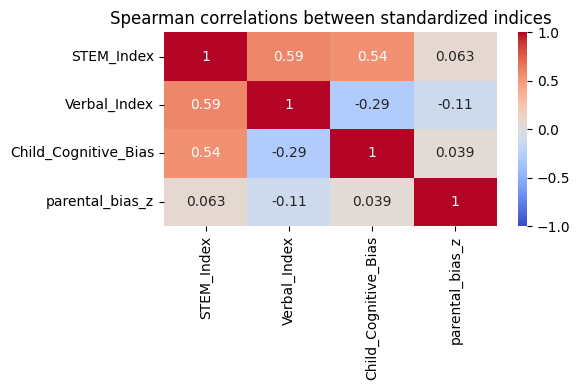

In [77]:
plt.figure(figsize=(6,4))
sns.heatmap(corr, annot=True, vmin=-1, vmax=1, cmap="coolwarm")
plt.title("Spearman correlations between standardized indices")
plt.tight_layout()
plt.show()


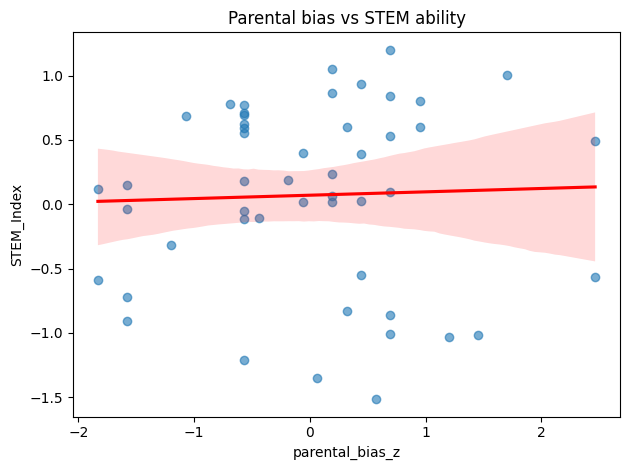

In [78]:
sns.regplot(
    x="parental_bias_z",
    y="STEM_Index",
    data=results,
    scatter_kws={"alpha": 0.6},
    line_kws={"color": "red"}
)
plt.title("Parental bias vs STEM ability")
plt.tight_layout()
plt.show()

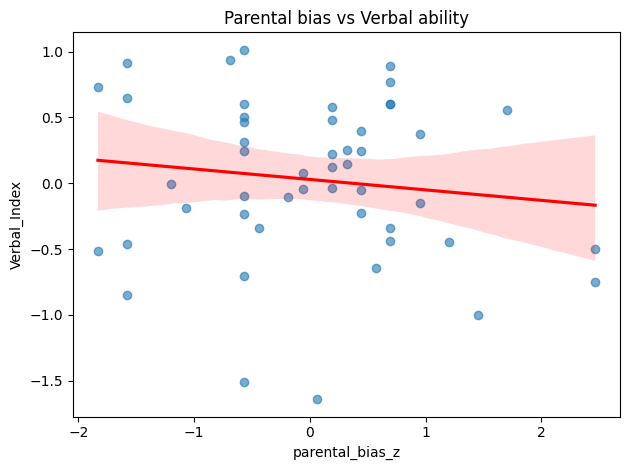

In [79]:
sns.regplot(
    x="parental_bias_z",
    y="Verbal_Index",
    data=results,
    scatter_kws={"alpha": 0.6},
    line_kws={"color": "red"}
)
plt.title("Parental bias vs Verbal ability")
plt.tight_layout()
plt.show()


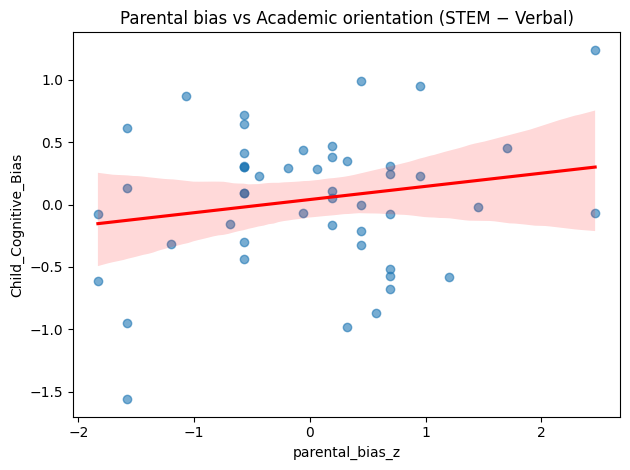

In [80]:
sns.regplot(
    x="parental_bias_z",
    y="Child_Cognitive_Bias",
    data=results,
    scatter_kws={"alpha": 0.6},
    line_kws={"color": "red"}
)
plt.title("Parental bias vs Academic orientation (STEM − Verbal)")
plt.tight_layout()
plt.show()


Index-Based Analysis Summary

In this analysis, we used standardized index scores instead of individual test scores. All scores were converted to z-scores so they could be compared on the same scale. We examined a STEM Index, a Verbal Index, and a Child Cognitive Bias index (STEM minus Verbal). The results showed a moderate relationship between STEM and Verbal abilities, while parental bias showed only weak relationships with the children’s cognitive measures. Using indices helped reduce noise from single tests and made the overall patterns easier to interpret.

### Preliminary Insights
The exploratory analysis reveals several notable patterns. Parental education levels, particularly father’s education, show moderate positive associations with children’s mathematical performance across multiple measures. In addition, parental education is also positively associated with verbal IQ, suggesting that children from more highly educated backgrounds tend to demonstrate stronger verbal abilities. Strong correlations among math-related measures indicate consistency across assessment tools. Overall, these findings support further investigation using multivariate statistical models.

##  Statistical Modeling: Hierarchical Regression

Following the exploratory data analysis, hierarchical regression was conducted in two steps in accordance with the study guidelines. The goal was to examine whether socio-educational background variables explain additional variance in cognitive performance beyond core IQ measures.

In [4]:
# Dependent variable
y = df["CMAT_BasicCalc_Comp_Quotient"]



### Stage A: Cognitive Ability Model (IQ + Working Memory Only)

In Stage A, cognitive performance was predicted using IQ indices (VIQ, PIQ, FSIQ) and a working memory measure only, as specified in the assignment guidelines.


In [5]:
import statsmodels.api as sm

# Dependent variable
y = df["CMAT_BasicCalc_Comp_Quotient"]

wm_col = "AWMA-S_VerbalWM_StS_t2"

X_stage1 = df[[
    "WASI_VIQ_t2",
    "WASI_PIQ_t2",
    "WASI_FSIQ_t2",
    wm_col
]]

X_stage1 = sm.add_constant(X_stage1)

model_stage1 = sm.OLS(y, X_stage1, missing="drop").fit()
print(model_stage1.summary())

print("Stage A N:", int(model_stage1.nobs))

                                 OLS Regression Results                                 
Dep. Variable:     CMAT_BasicCalc_Comp_Quotient   R-squared:                       0.370
Model:                                      OLS   Adj. R-squared:                  0.302
Method:                           Least Squares   F-statistic:                     5.430
Date:                          Wed, 14 Jan 2026   Prob (F-statistic):            0.00153
Time:                                  18:34:42   Log-Likelihood:                -182.88
No. Observations:                            42   AIC:                             375.8
Df Residuals:                                37   BIC:                             384.4
Df Model:                                     4                                         
Covariance Type:                      nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
-------------------

**Note on multicollinearity:** VIQ, PIQ, and FSIQ are strongly related measures (FSIQ reflects overall IQ and is correlated with VIQ/PIQ), so multicollinearity may inflate standard errors and reduce the apparent significance of individual IQ coefficients. This does not affect the hierarchical comparison of model fit across stages.

Working memory was operationalized as the standardized Verbal Working Memory score (AWMA-S_VerbalWM_StS_t2).

### Stage B: Extended Model with Socio-Educational Variables

In Stage B, socio-educational background variables were added to test whether they explain additional variance in cognitive performance beyond IQ and working memory.

In [6]:
X_stage2 = df[[
    "WASI_VIQ_t2",
    "WASI_PIQ_t2",
    "WASI_FSIQ_t2",
    "AWMA-S_VerbalWM_StS_t2",
    "mother_highest_grade",
    "father_highest_grade",
    "regular_classroom"
]]

X_stage2 = sm.add_constant(X_stage2)

model_stage2 = sm.OLS(y, X_stage2, missing="drop").fit()
print(model_stage2.summary())

                                 OLS Regression Results                                 
Dep. Variable:     CMAT_BasicCalc_Comp_Quotient   R-squared:                       0.469
Model:                                      OLS   Adj. R-squared:                  0.332
Method:                           Least Squares   F-statistic:                     3.412
Date:                          Wed, 14 Jan 2026   Prob (F-statistic):            0.00964
Time:                                  18:34:44   Log-Likelihood:                -149.08
No. Observations:                            35   AIC:                             314.2
Df Residuals:                                27   BIC:                             326.6
Df Model:                                     7                                         
Covariance Type:                      nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
-------------------

In [7]:
delta_r2 = model_stage2.rsquared - model_stage1.rsquared
print(f"ΔR² (Stage B – Stage A) = {delta_r2:.3f}")

ΔR² (Stage B – Stage A) = 0.100


A hierarchical regression analysis was conducted in two steps. In Stage A, IQ indices (VIQ, PIQ, FSIQ) and verbal working memory were entered and significantly predicted basic calculation performance, explaining approximately 37% of the variance. In Stage B, socio-educational background variables (parental education and classroom type) were added to the model. This extended model explained additional variance in performance (ΔR² ≈ .10), indicating that socio-educational factors contribute beyond cognitive ability and working memory, even though individual background predictors were not statistically significant.

### Hierarchical Model Comparison

To assess the incremental contribution of socio-educational variables, changes in explained variance (ΔR²) were examined.

In [8]:
# --------------------------------------------------
# Hierarchical Model Comparison
# --------------------------------------------------

# Change in explained variance (ΔR²)
delta_r2 = model_stage2.rsquared - model_stage1.rsquared
print(f"ΔR² (Stage B – Stage A) = {delta_r2:.3f}")

# Formal nested model comparison (F-test)
anova_results = sm.stats.anova_lm(model_stage1, model_stage2)
anova_results

ΔR² (Stage B – Stage A) = 0.100


,df_resid,ssr,df_diff,ss_diff,F,Pr(>F)
0,37.0,14889.009333,0.0,NaN,NaN,NaN
1,27.0,10264.303498,10.0,4624.705834,1.216518,0.324557


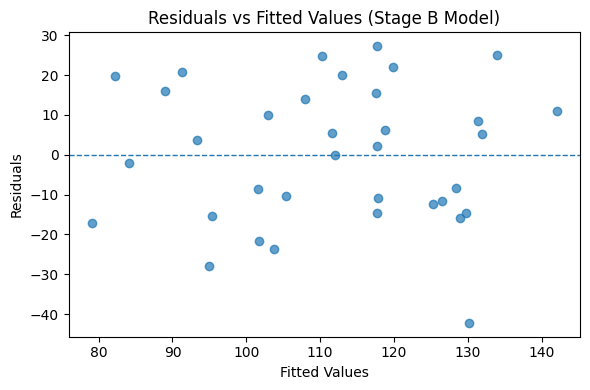

In [9]:
plt.figure(figsize=(6, 4))
plt.scatter(
    model_stage2.fittedvalues,
    model_stage2.resid,
    alpha=0.7
)
plt.axhline(0, linestyle="--", linewidth=1)
plt.xlabel("Fitted Values")
plt.ylabel("Residuals")
plt.title("Residuals vs Fitted Values (Stage B Model)")
plt.tight_layout()
plt.show()

Residuals appeared randomly scattered around zero, suggesting no major violations of linearity or homoscedasticity.

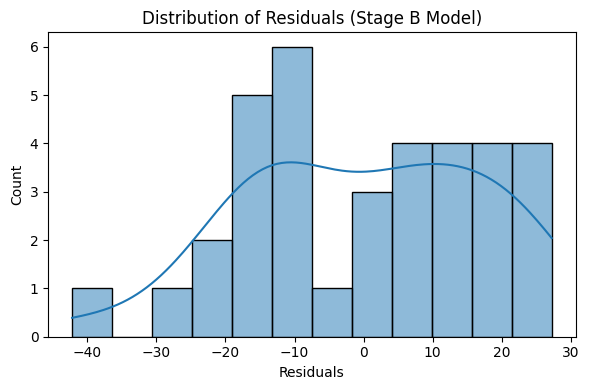

In [10]:
plt.figure(figsize=(6, 4))
sns.histplot(model_stage2.resid, kde=True, bins=12)
plt.xlabel("Residuals")
plt.title("Distribution of Residuals (Stage B Model)")
plt.tight_layout()
plt.show()

The residual distribution appears approximately normal, consistent with the non-significant Omnibus and Jarque–Bera tests reported for the model.

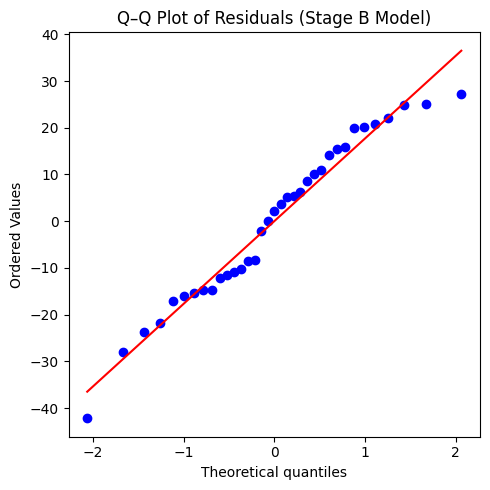

In [11]:
import scipy.stats as stats

plt.figure(figsize=(5, 5))
stats.probplot(model_stage2.resid, dist="norm", plot=plt)
plt.title("Q–Q Plot of Residuals (Stage B Model)")
plt.tight_layout()
plt.show()

The Q–Q plot shows that the residuals closely follow the theoretical normal distribution, with only minor deviations at the tails, indicating that the normality assumption is reasonably met.

C:\Users\Yair\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\stats\outliers_influence.py:847: RuntimeWarning: invalid value encountered in sqrt
  return self.resid / sigma / np.sqrt(1 - hii)


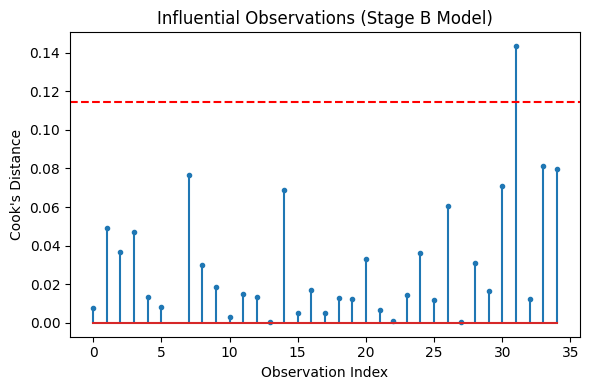

In [12]:
influence = model_stage2.get_influence()
cooks = influence.cooks_distance[0]

plt.figure(figsize=(6, 4))
plt.stem(cooks, markerfmt=".")
plt.axhline(4/len(cooks), color="red", linestyle="--")
plt.xlabel("Observation Index")
plt.ylabel("Cook's Distance")
plt.title("Influential Observations (Stage B Model)")
plt.tight_layout()
plt.show()

Cook’s distance values were generally low, with no observations exceeding the conventional threshold (4/n), indicating that the model results were not driven by influential outliers.

Overall Model Summary

A hierarchical regression analysis was conducted to examine predictors of basic calculation performance. In Stage A, IQ measures (VIQ, PIQ, FSIQ) together with verbal working memory explained a substantial part of the variance in performance. In Stage B, socio-educational background variables were added to the model and led to an additional increase in explained variance (ΔR² ≈ .10), suggesting that these factors contribute beyond cognitive abilities alone.

Model diagnostic plots indicated that regression assumptions were reasonably met. Residuals were approximately normally distributed and showed no clear pattern when plotted against fitted values, indicating no major violations of linearity or homoscedasticity. Cook’s distance values did not reveal influential observations that strongly affected the model. Overall, the results suggest that both cognitive abilities and socio-educational background play a role in explaining mathematical performance.